In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [16]:
# Load the data as numpy arrays
img_1 = pd.read_csv('./../data/feaSubEImg_1.csv', header=None).to_numpy()
img_2 = pd.read_csv('./../data/feaSubEImg_2.csv', header=None).to_numpy()
overt_1 = pd.read_csv('./../data/feaSubEOvert_1.csv', header=None).to_numpy()
overt_2 = pd.read_csv('./../data/feaSubEOvert_2.csv', header=None).to_numpy()

In [17]:
# Combine the features
img_X = np.hstack((img_1, img_2)).T
img_y = np.array([0] * img_1.shape[1] + [1] * img_2.shape[1])

overt_X = np.hstack((overt_1, overt_2)).T
overt_y = np.array([0] * overt_1.shape[1] + [1] * overt_2.shape[1])

### Plot ROC curve

In [18]:
def plot_roc_curve(y_true, decision_scores, title="ROC Curve"):
    fpr, tpr, thresholds = roc_curve(y_true, decision_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'Acc = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Cross-Train function

In [19]:
def cross_train_test(train_X, train_y, test_X, test_y, C_value, title_prefix=""):
    # Train SVM
    model = SVC(kernel='linear', C=C_value)
    model.fit(train_X, train_y)

    # Predict and get decision function
    y_pred = model.predict(test_X)
    decision_scores = model.decision_function(test_X)

    # Accuracy
    acc = accuracy_score(test_y, y_pred)

    # Plot ROC
    plot_roc_curve(test_y, decision_scores, title=f"{title_prefix} ROC Curve")

    return acc

### Testing Cross-Train

In [20]:
c_value = 0.0001

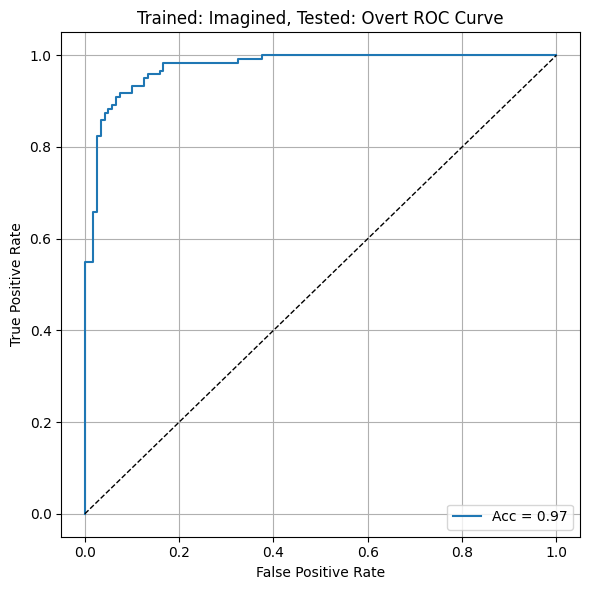

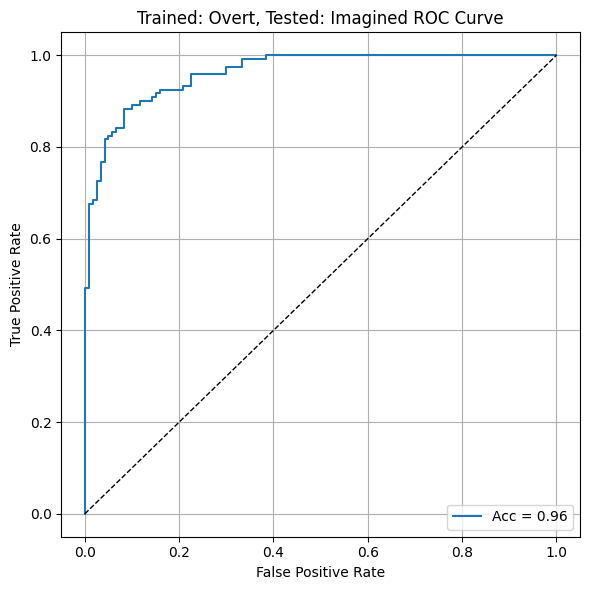

Train on Imagined, Test on Overt - Accuracy: 0.9125
Train on Overt, Test on Imagined - Accuracy: 0.8833333333333333


In [21]:
acc_im2ov = cross_train_test(img_X, img_y, overt_X, overt_y, c_value, title_prefix="Trained: Imagined, Tested: Overt")
acc_ov2im = cross_train_test(overt_X, overt_y, img_X, img_y, c_value, title_prefix="Trained: Overt, Tested: Imagined")

print("Train on Imagined, Test on Overt - Accuracy:", acc_im2ov)
print("Train on Overt, Test on Imagined - Accuracy:", acc_ov2im)